# Sentiment based on tweet frequency

There are 407,489 tweets that need to be split up

In [3]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# load cleaned tweet corpus data
df = pd.read_csv("../datain/topic_modelling/cleaned_tweets_largest_community.csv")
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...


# Clean data

In [41]:
# remove all null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
df = df.drop(df[df['cleaned_tweet'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

In [42]:
df[df["cleaned_tweet"].isnull()]

,created_at,id,cleaned_tweet


# Sentiment: apply polarity score

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [44]:
analyzer = SentimentIntensityAnalyzer()

In [45]:
# add polarity scores to df
# https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
pol = lambda x: analyzer.polarity_scores(x)
df['polarity'] = df["cleaned_tweet"].apply(pol)
df

,created_at,id,cleaned_tweet,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,"{'neg': 0.0, 'neu': 0.251, 'pos': 0.749, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp..."
...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,"{'neg': 0.0, 'neu': 0.476, 'pos': 0.524, 'comp..."
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,"{'neg': 0.252, 'neu': 0.34, 'pos': 0.408, 'com..."


In [47]:
# split polarity scores into separate columns
df = pd.concat([df.drop(['polarity'], axis=1), df['polarity'].apply(pd.Series)], axis=1)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.000,0.328,0.672,0.6249
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.000,0.251,0.749,0.9677
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.000,1.000,0.000,0.0000
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.000,0.467,0.533,0.8860
...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,0.000,0.196,0.804,0.6249
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,0.252,0.340,0.408,0.2960


## Sentiment: round polarity

In [49]:
def calc_polarity(x, bound):
    if x < -0.05:
        return -1
    elif x > 0.05:
        return 1
    else:
        return 0

round_pol = lambda x: calc_polarity(x, 0.05)

In [50]:
# round polarity up/down
df['rounded_polarity'] = df['compound'].apply(round_pol)
df

,created_at,id,cleaned_tweet,neg,neu,pos,compound,rounded_polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,0.000,0.256,0.744,0.4404,1
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,0.000,0.328,0.672,0.6249,1
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,0.000,0.251,0.749,0.9677,1
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,0.000,1.000,0.000,0.0000,0
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,0.000,0.467,0.533,0.8860,1
...,...,...,...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,0.000,0.196,0.804,0.6249,1
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,0.000,0.476,0.524,0.2960,1
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,0.000,0.196,0.804,0.6249,1
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,0.252,0.340,0.408,0.2960,1


Text(0.5, 0, 'Tweets')

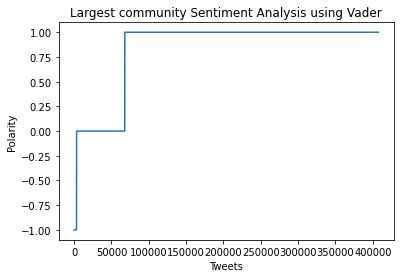

In [52]:
# plot rounded polarity
plt.plot(df.index, df['rounded_polarity'].sort_values())
plt.title('Largest community Sentiment Analysis using Vader')
plt.ylabel('Polarity')
plt.xlabel('Tweets')

In [53]:
# get amount of rounded negative, neutral, and positive polarity
num_rounded_sentiments = df.groupby('rounded_polarity').count()
num_rounded_sentiments

,created_at,id,cleaned_tweet,neg,neu,pos,compound
rounded_polarity,,,,,,,
-1,3289,3289,3289,3289,3289,3289,3289
0,64428,64428,64428,64428,64428,64428,64428
1,338314,338314,338314,338314,338314,338314,338314


Text(0, 0.5, 'Count')

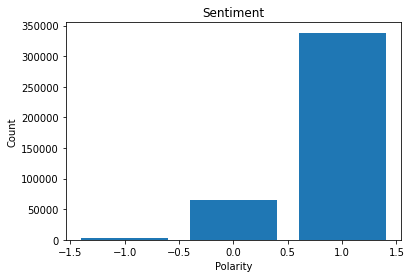

In [54]:
plt.bar(num_rounded_sentiments.index, num_rounded_sentiments["compound"])
plt.title('Sentiment')
plt.xlabel('Polarity')
plt.ylabel('Count')

# Split data into segments

In [31]:
# split df into n groups of equal length (returns list of sub dataframes)
# https://stackoverflow.com/questions/2130016/splitting-a-list-into-n-parts-of-approximately-equal-length
def split(a, n):
    k, m = divmod(len(a), n)
    return (a[i*k+min(i, m):(i+1)*k+min(i+1, m)] for i in range(n))

In [32]:
# list of dfs
sub_dfs = list(split(df, 58))
sub_dfs

[                     created_at                   id  \
 0     2021-05-31 23:59:42+00:00  1399515966774530048   
 1     2021-05-31 23:59:40+00:00  1399515957362450432   
 2     2021-05-31 23:59:35+00:00  1399515936093204480   
 3     2021-05-31 23:58:47+00:00  1399515734007447552   
 4     2021-05-31 23:58:44+00:00  1399515723274280960   
 ...                         ...                  ...   
 7009  2021-05-31 09:41:18+00:00  1399299939797245952   
 7010  2021-05-31 09:40:48+00:00  1399299814060265472   
 7011  2021-05-31 09:40:46+00:00  1399299806766387200   
 7012  2021-05-31 09:40:38+00:00  1399299773165752320   
 7013  2021-05-31 09:40:36+00:00  1399299766496858112   
 
                                           cleaned_tweet  
 0                                          good project  
 1                                   great project reset  
 2     beautiful project congratulations whole team h...  
 3            participating cryptoultraman airdrop round  
 4     nice find pr

In [33]:
sub_dfs[0]

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
7009,2021-05-31 09:41:18+00:00,1399299939797245952,ape come stay go ape
7010,2021-05-31 09:40:48+00:00,1399299814060265472,nice airdrop join airdrop
7011,2021-05-31 09:40:46+00:00,1399299806766387200,nice project
7012,2021-05-31 09:40:38+00:00,1399299773165752320,good project


# Sentiment analysis

In [21]:
# polarity score print
# for sub_df in sub_dfs:
#     for tweet in sub_df["cleaned_tweet"]:
#         # polarity score
#         vs = analyzer.polarity_scores(tweet)
#         print("{:-<65} {}".format(tweet, str(vs)))

## Add polarity score

In [36]:
# # https://github.com/sidneykung/twitter_hate_speech_detection/blob/master/preprocessing/VADER_sentiment.ipynb
# pol = lambda x: analyzer.polarity_scores(x)

# for sub_df in sub_dfs:
#     sub_df["polarity"] = sub_df["cleaned_tweet"].apply(pol)
# sub_dfs[0]

/var/folders/sx/4r548nsj58s0_cc4jj_vs37h0000gn/T/ipykernel_6322/3945240852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["polarity"] = sub_df["cleaned_tweet"].apply(pol)


,created_at,id,cleaned_tweet,polarity
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,"{'neg': 0.0, 'neu': 0.328, 'pos': 0.672, 'comp..."
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,"{'neg': 0.0, 'neu': 0.251, 'pos': 0.749, 'comp..."
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,"{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'comp..."
...,...,...,...,...
7009,2021-05-31 09:41:18+00:00,1399299939797245952,ape come stay go ape,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
7010,2021-05-31 09:40:48+00:00,1399299814060265472,nice airdrop join airdrop,"{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'comp..."
7011,2021-05-31 09:40:46+00:00,1399299806766387200,nice project,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
7012,2021-05-31 09:40:38+00:00,1399299773165752320,good project,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp..."
